# I. Perkenalan

Nama: Wenny Chandra Sari

Batch: 015

Objective: Membuatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dalam 
6 bulan terakhir.

Query Dataset:
```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.credit-card-information`
WHERE mod(CUST_ID,2) <> 1;
```
About Dataset:

<img src='https://camo.githubusercontent.com/421c39f19d05b00c2e90bd698f5f6728bb0908a4ddbebeb6177bcfc4105c9dca/68747470733a2f2f692e6962622e636f2f32736266304a732f50312d47342d446174617365742d496e666f726d6174696f6e2e706e67'>

Reference:
- https://github.com/H8-Assignments-Bay/p1---ftds015---g4-WennyCS
- https://www.youtube.com/watch?v=lX8TSxA8QJw&ab_channel=FinanceMatters

# II. Import Libraries

In [122]:
# instalation for handling outlier

!pip install feature-engine

from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
# kolom lib

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FixedLocator, FixedFormatter

# basic syntax
pd.set_option('display.Max_columns',None)
import warnings
warnings.filterwarnings('ignore')

# scaling
from sklearn.preprocessing import MinMaxScaler

# multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PCA
from sklearn.decomposition import PCA

# elbow & silhouette for PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor

# cluster
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC

# II. Data Loading

In [124]:
# load dataset
data_o = pd.read_csv('h8dsft_P1G4_wennychandrasari.csv')

# copy dataset
data = data_o.copy()

# check the first 5 data
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [125]:
# check the last 5 data

data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [126]:
# check null rows

data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [127]:
# check column type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [128]:
# check dataset statistical info

data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [129]:
# check nunique of every columns

data.nunique()

CUST_ID                             4475
BALANCE                             4433
BALANCE_FREQUENCY                     43
PURCHASES                           3203
ONEOFF_PURCHASES                    2093
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2169
PURCHASES_FREQUENCY                   46
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
PAYMENTS                            4362
MINIMUM_PAYMENTS                    4319
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [130]:
# memeriksa isi kolom TENURE
data.TENURE.value_counts()

12    3777
11     199
10     122
6      101
8       99
7       90
9       87
Name: TENURE, dtype: int64

---
Statement:
- Dataset terdiri atas 4475 baris dan 18 kolom.
- Dataset terdiri atas 14 tipe float64 dan 4 int64.
- Dataset memiliki 155 missing values di kolom MINIMUM_PAYMENTS.
- Tidak ada anomali pada dataset.
- 16 kolom adalah numerik dan 1 kolom tenure adalah kategorik

# IV. Exploratory Data Analysis (EDA)

Melihat hubungan antar kolom dengan get_dummies, corr, background_gradient, dan cmap:

In [131]:
# get_dummies, corr, background_gradient, dan cmap

X = pd.get_dummies(data).corr()
X.style.background_gradient(cmap='coolwarm')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,1.000000,-0.021686,0.016669,0.007874,0.005534,0.008029,-0.036737,0.008931,-0.006083,0.007658,-0.023148,-0.003485,0.001074,-0.017912,-0.001595,0.035194,-0.002619,0.005505
BALANCE,-0.021686,1.000000,0.320619,0.187328,0.167061,0.124402,0.520446,-0.077008,0.066430,-0.060508,0.466017,0.383785,0.159587,0.524961,0.314899,0.384727,-0.320950,0.072758
BALANCE_FREQUENCY,0.016669,0.320619,1.000000,0.135298,0.101296,0.126404,0.110155,0.226440,0.202556,0.172290,0.191027,0.137942,0.187932,0.088156,0.062314,0.128450,-0.065548,0.118922
PURCHASES,0.007874,0.187328,0.135298,1.000000,0.910604,0.629758,-0.052427,0.406943,0.505073,0.324841,-0.116927,-0.062805,0.697422,0.361141,0.614773,0.122752,0.180073,0.086942
ONEOFF_PURCHASES,0.005534,0.167061,0.101296,0.910604,1.000000,0.252461,-0.044112,0.267201,0.523013,0.125705,-0.084448,-0.048800,0.526970,0.324166,0.569453,0.065777,0.129681,0.068452
INSTALLMENTS_PURCHASES,0.008029,0.124402,0.126404,0.629758,0.252461,1.000000,-0.039929,0.450342,0.199310,0.524022,-0.115095,-0.055383,0.642286,0.236124,0.369109,0.163527,0.178064,0.074732
CASH_ADVANCE,-0.036737,0.520446,0.110155,-0.052427,-0.044112,-0.039929,1.000000,-0.210290,-0.079799,-0.167850,0.661395,0.681496,-0.045941,0.303921,0.418203,0.143400,-0.167600,-0.061952
PURCHASES_FREQUENCY,0.008931,-0.077008,0.226440,0.406943,0.267201,0.450342,-0.210290,1.000000,0.502653,0.861212,-0.299092,-0.188039,0.562436,0.106659,0.108692,0.016398,0.322448,0.051175
ONEOFF_PURCHASES_FREQUENCY,-0.006083,0.066430,0.202556,0.505073,0.523013,0.199310,-0.079799,0.502653,1.000000,0.137608,-0.106753,-0.053327,0.530432,0.265947,0.253170,-0.037131,0.176696,0.093386
PURCHASES_INSTALLMENTS_FREQUENCY,0.007658,-0.060508,0.172290,0.324841,0.125705,0.524022,-0.167850,0.861212,0.137608,1.000000,-0.248807,-0.153798,0.525132,0.049628,0.091086,0.044943,0.256954,0.054934


In [132]:
# melihat rata-rata korelasi dari tinggi ke rendah

X.mean().sort_values(ascending=False)

PURCHASES                           0.329926
PURCHASES_TRX                       0.314987
PAYMENTS                            0.301817
ONEOFF_PURCHASES                    0.270001
INSTALLMENTS_PURCHASES              0.264898
CREDIT_LIMIT                        0.253877
BALANCE                             0.234048
ONEOFF_PURCHASES_FREQUENCY          0.231843
PURCHASES_FREQUENCY                 0.228728
PURCHASES_INSTALLMENTS_FREQUENCY    0.196947
BALANCE_FREQUENCY                   0.181162
CASH_ADVANCE                        0.162910
CASH_ADVANCE_TRX                    0.151541
MINIMUM_PAYMENTS                    0.141432
CASH_ADVANCE_FREQUENCY              0.115862
TENURE                              0.101097
PRC_FULL_PAYMENT                    0.078911
CUST_ID                             0.054622
dtype: float64

In [133]:
# melihat korelasi dari tinggi ke rendah selain nilai 1 atau korelasi dengan dirinya sendiri.

X[X != 1].max().sort_values(ascending=False)

PURCHASES                           0.910604
ONEOFF_PURCHASES                    0.910604
PURCHASES_INSTALLMENTS_FREQUENCY    0.861212
PURCHASES_FREQUENCY                 0.861212
CASH_ADVANCE_FREQUENCY              0.787348
CASH_ADVANCE_TRX                    0.787348
PURCHASES_TRX                       0.697422
CASH_ADVANCE                        0.681496
INSTALLMENTS_PURCHASES              0.642286
PAYMENTS                            0.614773
ONEOFF_PURCHASES_FREQUENCY          0.530432
BALANCE                             0.524961
CREDIT_LIMIT                        0.524961
MINIMUM_PAYMENTS                    0.384727
PRC_FULL_PAYMENT                    0.322448
BALANCE_FREQUENCY                   0.320619
TENURE                              0.143556
CUST_ID                             0.035194
dtype: float64

Beberapa kolom memiliki hubungan yang kuat. Kita akan mengambil kolom credit_limit yang menurut Data Scientist menarik karena akan menjadi penentu balance, purchases, oneoff_purchases, installments_purchases, cash_advance, payments.

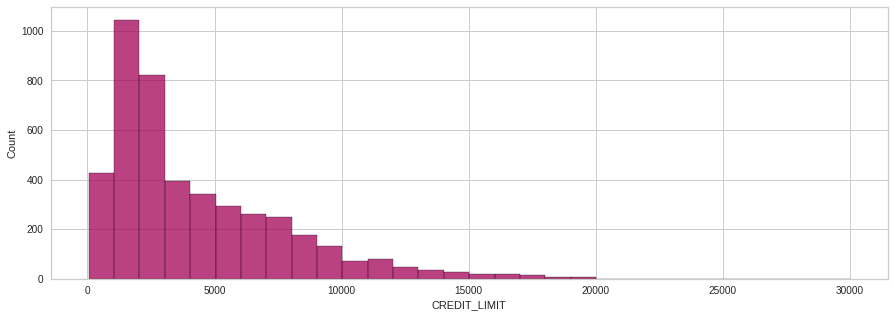

In [134]:
# melihat CREDIT LIMIT

plt.figure(figsize=(15,5))
sns.histplot(data, x = 'CREDIT_LIMIT', bins=30, color='m')
plt.show()

In [135]:
# melihat modus CREDIT LIMIT

data.CREDIT_LIMIT.mode()[0]

3000.0

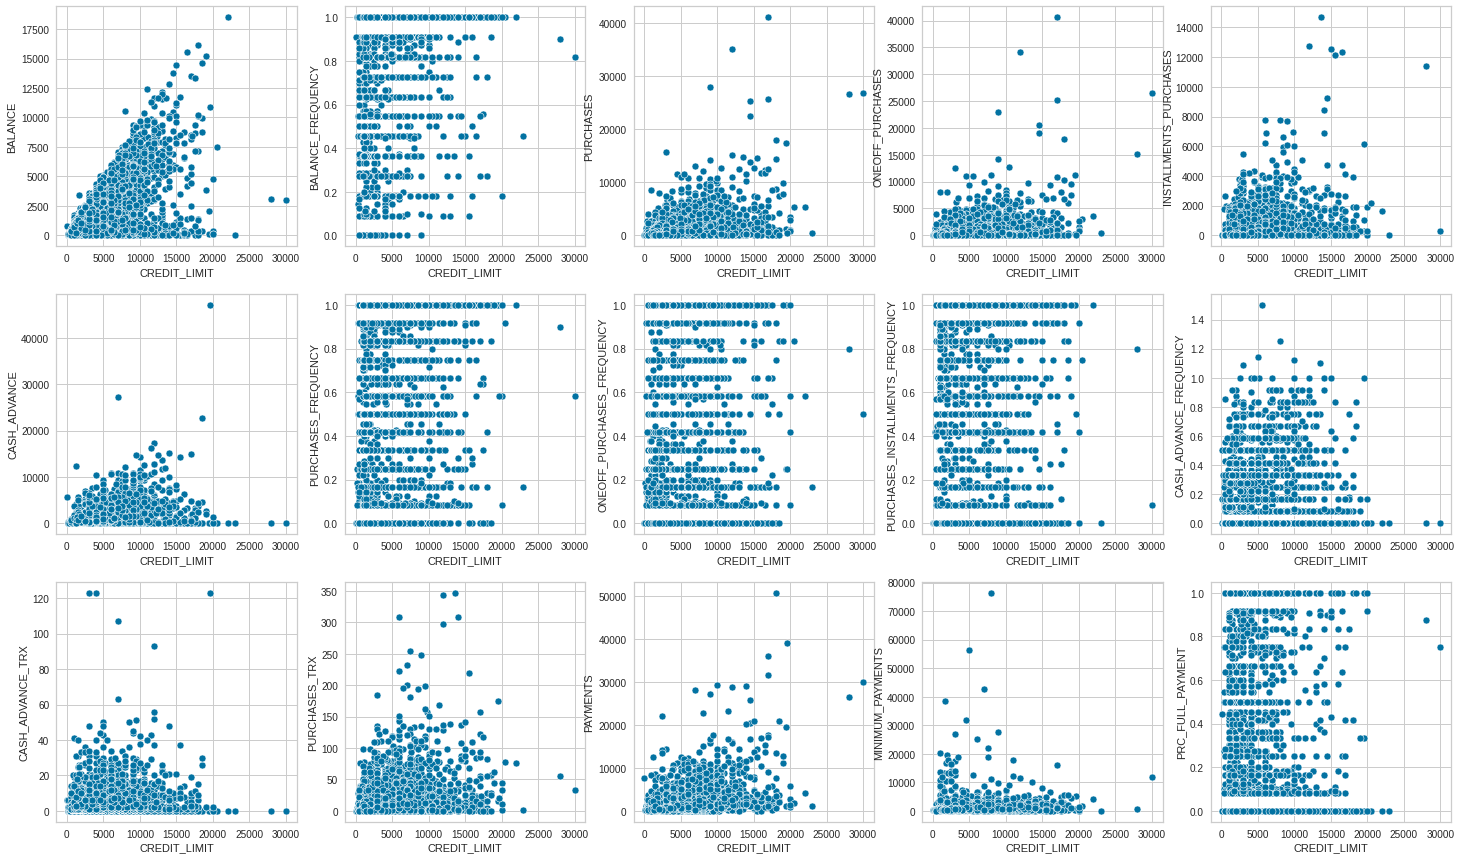

In [136]:
# melihat hubungan limit_balance dengan kolom lainnya

fig,axes=plt.subplots(nrows=3,ncols=5,figsize=(25,15))
i=0
j=0
for col in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']:
    sns.scatterplot(data=data, x='CREDIT_LIMIT',y=col,ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>4:
        i+=1
        j=0

Berdasarkan scatterplot, Data Scientist melihat:
- hubungan yang positif antara CREDIT_LIMIT dan BALANCE, terdapat beberapa titik yang dicurigai sebagai outlier.
- hubungan yang positif antara CREDIT_LIMIT dan PURCHASES, terdapat beberapa titik yang dicurigai sebagai outlier.
- hubungan yang positif antara CREDIT_LIMIT dan ONEOFF_PURCHASES, terdapat beberapa titik yang dicurigai sebagai outlier.
- hubungan yang positif antara CREDIT_LIMIT dan INSTALLMENTS_PURCHASES, terdapat beberapa titik yang dicurigai sebagai outlier.
- hubungan yang positif antara CREDIT_LIMIT dan CASH_ADVANCE, terdapat beberapa titik yang dicurigai sebagai outlier.
- hubungan yang positif antara CREDIT_LIMIT dan CASH_ADVANCE_TRX
- hubungan yang positif antara CREDIT_LIMIT dan PURCHASES_TRX
- hubungan yang positif antara CREDIT_LIMIT dan PAYMENTS, terdapat beberapa titik yang dicurigai sebagai outlier.
- hubungan yang positif berarti secara umum semakin besar CREDIT_LIMIT, semakin besar BALANCE, PURCHASES, ONEOFF_PURCHASES,  INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASES_TRX, PAYMENTS, meski ada beberapa data yang berbeda.

Data Scientist ingin melihat hubungan antara kolom CREDIT LIMIT, BALANCE, PURCHASE, dan PRC_FULL_PAYMENT.

Kita akan melihat persebaran data di tiap kolom numerik

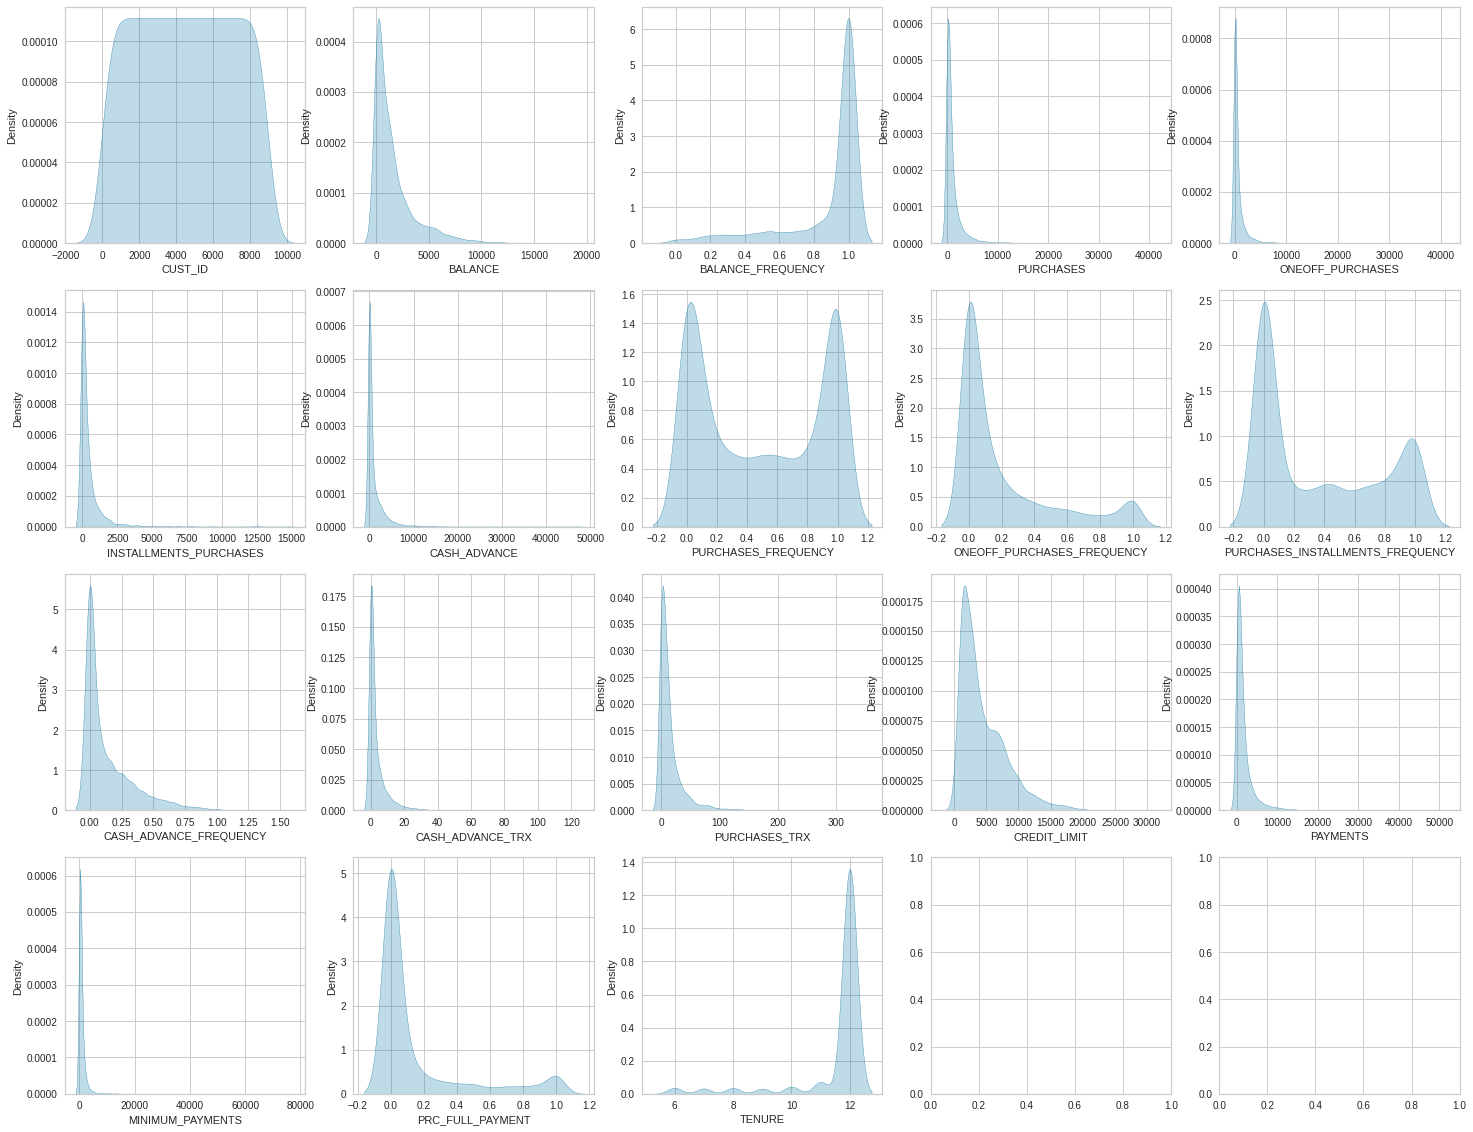

In [137]:
fig,axes=plt.subplots(nrows=4,ncols=5,figsize=(25,20))
i=0
j=0
for col in data.columns:
    sns.kdeplot(data=data, x=col, fill=True,ax=axes[i][j])
    j+=1
    if j>4:
        i+=1
        j=0
    if i==5:
        break

Berdasarkan KDEplot, Data Scientist melihat:

- Beberapa kolom mengalami rightskew dan beberapa kolom mengalami leftskew.
- Terdapat 2 puncak pada kolom 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY, dan 'PRC_FULL_PAYMENT'
- Pada kolom PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PRC_FULL_PAYMENT terdapat nilai negatif yang seharusnya tidak ada. Akan dicek lebih lanjut di handling outlier.
- Terdapat outlier.
- Credit limit terbanyak berada di antara 0-5000 Dollars.

Kita akan melihat persebaran data di kolom kategori

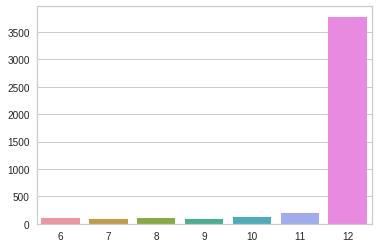

In [138]:
sns.barplot(x=data.TENURE.value_counts().index, y=data.TENURE.value_counts().values)

Lebih dari 3500 pengguna kartu kredit memiliki masa waktu 12 bulan, sisanya 6-11 bulan.

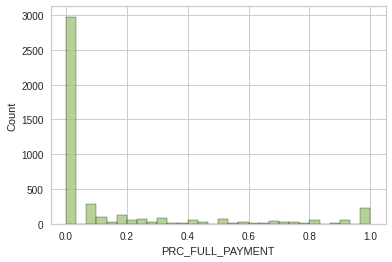

In [139]:
# melihat persebaran kolom PRC_FULL_PAYMENT

sns.histplot(data=data, x='PRC_FULL_PAYMENT', bins=30, color='g')
plt.show()

Lebih dari 3000 nasabah hanya melakukan pembayaran rata2 0 - 0.2 persen setiap bulannya. Kemungkinan Nasabah Default sangat tinggi.

__Kesimpulan:__
- beberapa kolom pada mengalami rightskew and left skew.
- kolom credit limit memiliki hubungan yang positif dengan 8 kolom yakni, semakin besar CREDIT_LIMIT, semakin besar BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASES_TRX, PAYMENTS, meski ada beberapa data yang berbeda. Credit limit terbanyak ada di angka 0 sampai 5000, terutama di 3000.
- Lebih dari 3500 pengguna kartu kredit memiliki masa waktu 12 bulan, sisanya 6-11 bulan.
- Lebih dari 3000 nasabah hanya melakukan pembayaran rata2 0 - 0.2 persen setiap bulannya. Kemungkinan Nasabah Default sangat tinggi.

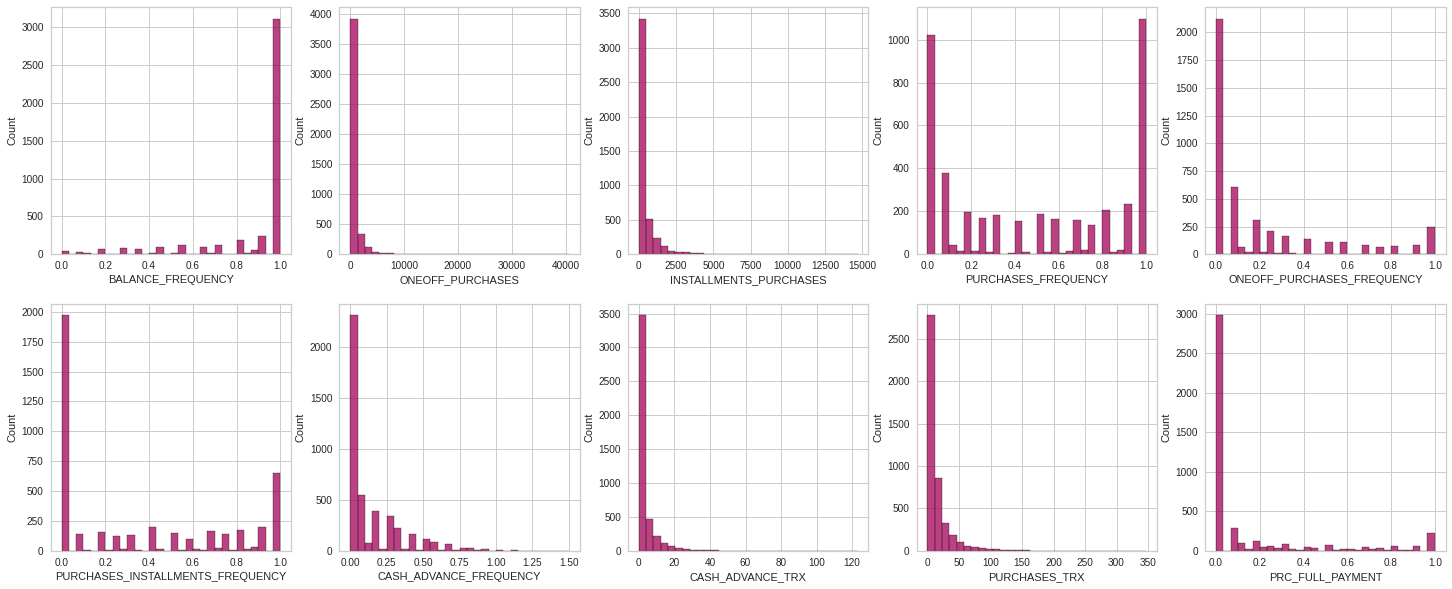

In [140]:
# GRAFIK LAIN

fig,axes=plt.subplots(nrows=2,ncols=5,figsize=(25,10))
i=0
j=0
for col in ['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
            'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT']:
    sns.histplot(data=data, x=col, bins=30, color='m', ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>4:
        i+=1
        j=0

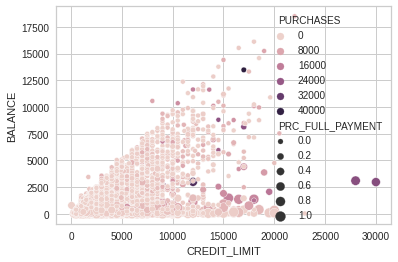

In [141]:
# melihat hubungan CREDIT LIMIT, BALANCE, PURCHASE, dan PRC_FULL_PAYMENT 

sns.scatterplot(data=data, x='CREDIT_LIMIT',y='BALANCE', hue= 'PURCHASES', size='PRC_FULL_PAYMENT')
plt.show()

# V. Data Preprocessing

## 1. Get Data for model Inference

In [142]:
# get data inference
data_i = data.sample(20, random_state=30)

# remove data inference from dataset
data = data.drop(data_i.index)

# reset data inf and dataset index
data_i.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# check result shape
print('Ukuran data asli :',data_o.shape)
print('Ukuran data inference :', data_i.shape)
print('Ukuran data asli - data inference :', data.shape)

Ukuran data asli : (4475, 18)
Ukuran data inference : (20, 18)
Ukuran data asli - data inference : (4455, 18)


In [143]:
# melihat TENURE pada data inference

data_i.TENURE.value_counts()

12    15
6      2
9      1
7      1
8      1
Name: TENURE, dtype: int64

## 2. Handling Outliers

In [144]:
# menampilkan data

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [145]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(df_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', df_train[variable].skew())
    if (df_train[variable].skew() >= -0.5 ) | (df_train[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

### a. Distribution and Outlier Detection

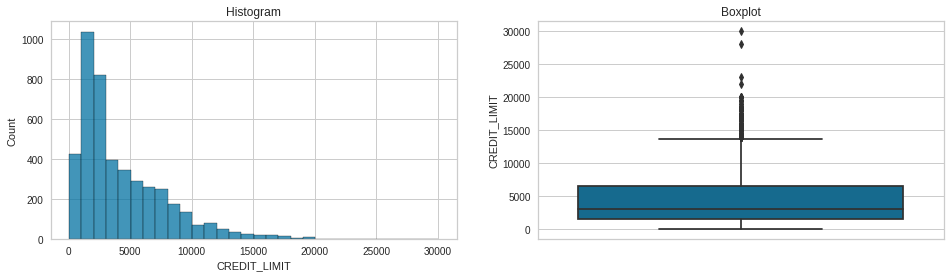

skewness: 1.494466642635993
the distribution is skewed


In [146]:
# memeriksa persebaran kolom CREDIT_LIMIT

diagnostic_plots(data, 'CREDIT_LIMIT')

In [147]:
# memeriksa persebaran kolom CREDIT_LIMIT

data.CREDIT_LIMIT.value_counts().sort_index()

50.0       1
150.0      2
200.0      2
300.0      5
400.0      2
          ..
20000.0    4
22000.0    1
23000.0    1
28000.0    1
30000.0    1
Name: CREDIT_LIMIT, Length: 157, dtype: int64

Data Scientist hanya akan melakukan handling outlier pada kolom ONEOFF_PURCHASES yang nilainya di atas CREDIT_LIMIT 

In [148]:
# memeriksa outlier kolom ONEOFF_PURCHASES terhadap CREDIT_LIMIT

data[data['ONEOFF_PURCHASES']> data['CREDIT_LIMIT']].sort_values('CREDIT_LIMIT')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1142,4051,112.010460,1.000000,229.00,229.00,0.00,0.000000,0.181818,0.181818,0.000000,0.00,0,4,150.0,119.626820,252.515849,0.000000,11
38,2657,42.996921,1.000000,230.04,230.04,0.00,0.000000,0.250000,0.250000,0.000000,0.00,0,4,200.0,187.489678,186.703736,0.000000,12
2583,21,260.636327,1.000000,673.28,673.28,0.00,477.616267,0.583333,0.583333,0.000000,0.25,6,29,300.0,1150.334467,435.025577,0.272727,12
1640,2295,143.025504,1.000000,1312.35,1312.35,0.00,0.000000,0.916667,0.916667,0.000000,0.00,0,12,300.0,1212.600880,178.466749,0.500000,12
2228,5777,22.366132,0.636364,502.54,502.54,0.00,0.000000,0.416667,0.416667,0.000000,0.00,0,8,450.0,907.540077,58.374520,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,6295,2997.977825,1.000000,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.00,0,344,12000.0,28896.665220,767.014180,0.750000,12
543,2545,5968.583246,1.000000,22381.97,19150.02,3231.95,0.000000,1.000000,1.000000,0.583333,0.00,0,87,14500.0,20343.286810,1966.191831,0.000000,12
599,3085,8809.504736,1.000000,25378.36,20646.07,4732.29,0.000000,1.000000,1.000000,1.000000,0.00,0,136,14500.0,25825.324820,2921.628286,0.000000,12
2128,7855,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.00,0,157,17000.0,36066.750680,15914.484620,0.083333,12


In [149]:
io_oop =data[data['ONEOFF_PURCHASES']> data['CREDIT_LIMIT']].index
io_oop

Int64Index([  36,   38,   42,  256,  264,  270,  306,  318,  331,  342,  357,
             447,  461,  470,  474,  513,  524,  538,  543,  558,  567,  599,
             630,  671,  680,  708,  741,  746,  776,  829,  831,  834,  839,
             871,  876,  883,  919, 1009, 1011, 1012, 1039, 1048, 1077, 1091,
            1124, 1142, 1249, 1361, 1458, 1469, 1495, 1584, 1591, 1634, 1640,
            1645, 1651, 1652, 1665, 1722, 1849, 1893, 1939, 1958, 1977, 1996,
            2010, 2048, 2056, 2070, 2082, 2114, 2115, 2121, 2128, 2156, 2206,
            2228, 2288, 2309, 2484, 2583, 3197, 3212, 3235, 3304, 3308, 3356,
            3401, 3563, 3602, 3615, 3899, 3961, 4026, 4044],
           dtype='int64')

Nilai pada kolom ONEOFF_PURCHASES tidak mungkin di atas kolom CREDIT_LIMIT, kita akan melakukan imputasi dengan kolom CREDIT_LIMIT.

In [150]:
# memeriksa outlier pada kolom BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, PRC_FULL_PAYMENT batas 0 sampai dengan 1

print(data[(data['BALANCE_FREQUENCY']> 1) | (data['BALANCE_FREQUENCY']< 0)]['BALANCE_FREQUENCY'].count())
print(data[(data['PURCHASES_FREQUENCY']> 1) | (data['PURCHASES_FREQUENCY']< 0)]['PURCHASES_FREQUENCY'].count())
print(data[(data['ONEOFF_PURCHASES_FREQUENCY']> 1) | (data['ONEOFF_PURCHASES_FREQUENCY']< 0)]['ONEOFF_PURCHASES_FREQUENCY'].count())
print(data[(data['PURCHASES_INSTALLMENTS_FREQUENCY']> 1) | (data['PURCHASES_INSTALLMENTS_FREQUENCY']< 0)]['PURCHASES_INSTALLMENTS_FREQUENCY'].count())
print(data[(data['CASH_ADVANCE_FREQUENCY']> 1) | (data['CASH_ADVANCE_FREQUENCY']< 0)]['CASH_ADVANCE_FREQUENCY'].count())    # terdapat outlier di sini 
print(data[(data['PRC_FULL_PAYMENT']> 1) | (data['PRC_FULL_PAYMENT']< 0)]['PRC_FULL_PAYMENT'].count())

0
0
0
0
6
0


In [151]:
# memeriksa outlier pada kolom CASH_ADVANCE_FREQUENCY
data[(data['CASH_ADVANCE_FREQUENCY']> 1) | (data['CASH_ADVANCE_FREQUENCY']< 0)]['CASH_ADVANCE_FREQUENCY'] 

2763    1.125000
2764    1.250000
2765    1.500000
3389    1.142857
4142    1.100000
4449    1.090909
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [152]:
# mendapatkan index
data[(data['CASH_ADVANCE_FREQUENCY']> 1) | (data['CASH_ADVANCE_FREQUENCY']< 0)]['CASH_ADVANCE_FREQUENCY'].index

Int64Index([2763, 2764, 2765, 3389, 4142, 4449], dtype='int64')

Range kolom CASH_ADVANCE_FREQUENCY adalah 0-1, kita akan capping nilai di atas 1 menjadi nilai 1

### b. Handling Outliers

#### 1) Imputasi kolom ONE_OFF_PURCHASES dengan nilai CREDIT LIMIT

In [153]:
# kolom ONE_OFF_PURCHASES

data.loc[io_oop, 'ONEOFF_PURCHASES'] = data.loc[io_oop, 'CREDIT_LIMIT']

In [154]:
data[data['ONEOFF_PURCHASES']> data['CREDIT_LIMIT']].sort_values('CREDIT_LIMIT')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


#### 2) Capping kolom CASH_ADVANCE_FREQUENCY with loc

In [155]:
data.loc[[2776, 2777, 2778, 3405, 4161], 'CASH_ADVANCE_FREQUENCY'] = 1

In [156]:
data[(data['CASH_ADVANCE_FREQUENCY']> 1) | (data['CASH_ADVANCE_FREQUENCY']< 0)]['CASH_ADVANCE_FREQUENCY'] 

2763    1.125000
2764    1.250000
2765    1.500000
3389    1.142857
4142    1.100000
4449    1.090909
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

Data sudah bebas dari outlier

## 3. Handling Missing Value

In [157]:
# memeriksa missing values

data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [158]:
# memeriksa persentase missing values

data.isnull().sum()/data.count()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.036047
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Karena missing values yang tidak sampai 1 persen kita akan menghapus missing values.

In [159]:
# menghapus missing values

data.dropna(inplace=True)

# memeriksa missing values

data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Data telah bersih dari missing values.

## 4. Feature Selection

Berdasarkan EDA Datascientis memilih semua feature kecuali kolom 'CUST_ID'

In [160]:
# menghapus kolom cust_id yang memiliki korelasi terkecil dengan kolom lainnya

data.drop('CUST_ID', axis = 1, inplace=True)

# melihat feature yang dipilih

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,757.964752,0.875,157.4,157.4,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.0,1150.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.0,600.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8
5,611.561026,1.000,765.0,765.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,2000.0,204.464151,146.352314,0.0,8
7,105.333584,0.375,306.0,306.0,0.0,0.0,0.125,0.125,0.0,0.0,0,2,6000.0,101.986927,118.324082,0.0,8


## 5. Split Between Numerical Columns and Categorical Columns

In [161]:
# memilih kolom

num_cols = data.drop('TENURE', axis=1).columns
cat_cols = data['TENURE'].name

print('Kolom numerik: {}'.format(num_cols))
print('Kolom kategori: {}'.format(cat_cols))

Kolom numerik: Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')
Kolom kategori: TENURE


In [162]:
# membuat dataframe untuk data_num dan data_cat

data_num = data[num_cols]
data_cat = data[[cat_cols]]

## 6. Feature Scaling

Berdasarkan EDA, persebaran pada feature numerik adalah skew sehingga kita menggunakan MinMaxScaler.

In [163]:
# scaling menggunakan MinMaxScaler

scaler2 = MinMaxScaler()
scaler2.fit(data_num)

data_numskewscaled = scaler2.transform(data_num)

# show instance

data_numskewscaled[:3]

array([[0.04098091, 0.875     , 0.00383431, 0.00593641, 0.        ,
        0.        , 0.125     , 0.125     , 0.        , 0.        ,
        0.        , 0.01729107, 0.03839733, 0.0294635 , 0.03453358,
        0.        ],
       [0.01430433, 0.375     , 0.02801434, 0.04337279, 0.        ,
        0.        , 0.125     , 0.125     , 0.        , 0.        ,
        0.        , 0.00288184, 0.03839733, 0.05972487, 0.00111784,
        0.        ],
       [0.02382267, 1.        , 0.01461618, 0.02262928, 0.        ,
        0.        , 0.125     , 0.125     , 0.        , 0.        ,
        0.        , 0.00288184, 0.03171953, 0.0042441 , 0.00180387,
        0.        ]])

## 7. Feature Encoding

Feature kategori sudah dalam bentuk angka sehingga tidak perlu di-encode lagi.

## 8. PCA

In [164]:
# feature di data_numskewscaled

data_numskewscaled.shape

(4300, 16)

data_numskewscaled memiliki 16 feature sebelum direduksi.

In [165]:
#Cek Multicollinearity

vif_data = pd.DataFrame()
vif_data["feature"] = data_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_num.values, i) for i in range(len(data_num.columns))]

vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

,feature,VIF
0,PURCHASES_FREQUENCY,26.742202
1,PURCHASES,17.446396
2,PURCHASES_INSTALLMENTS_FREQUENCY,17.051784
3,ONEOFF_PURCHASES,11.160222
4,ONEOFF_PURCHASES_FREQUENCY,6.042281
5,BALANCE_FREQUENCY,5.557925
6,INSTALLMENTS_PURCHASES,4.748337
7,CASH_ADVANCE_FREQUENCY,4.630910
8,CREDIT_LIMIT,4.427986
9,PURCHASES_TRX,4.266994


- Ada 11 feature yang memiliki kaitan kecil dengan feature lainnya.
- Dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi sampai 5 dimensi

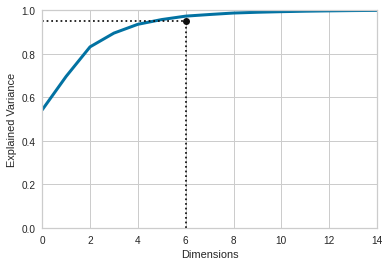

In [166]:
# define PCA
pca = PCA()
pca.fit(data_numskewscaled)

# PCA dengan informasi 0.95

cumsum = np.cumsum(pca.explained_variance_ratio_) # cumsum = kulumasi baris atau kolom berikutnya bergantung axis = 0 atau 1
d = np.argmax(cumsum >= 0.95) + 1                 # argmax = returns the indices of the maximum values along an axis.   

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")           # plt. plot([X1,X2], [y1,y2]), ':k' = balck
plt.plot([0, d], [0.95, 0.95], "k:")        # plt. plot([X1,X2], [y1,y2]), ':k' = balck
plt.plot(d, 0.95, "ko")                     # plot elbow, ko = circle b
plt.grid(True)
plt.show()

In [167]:
# melihat n_components untuk 0.95 informasi

pca6 = PCA(n_components=0.95)
data_reduced6 = pca6.fit_transform(data_numskewscaled)
pca.n_components_

16

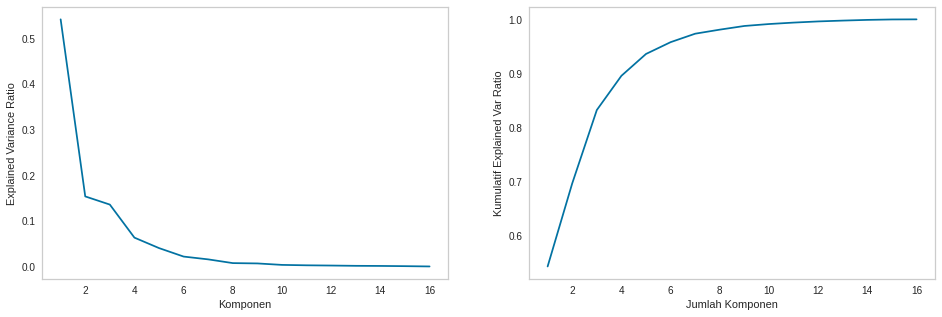

In [168]:
# melihat EVR dan cumsum EVR

# plot EVR
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,17),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].grid()

# plot cumsum EVR
ax[1].plot(range(1,17),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
ax[1].grid()
plt.show()

In [169]:
# melihat jumlah informasi yang dibawa dengan reduksi n_components = 5 sesuai dengan nilai VIF

pca5 = PCA(n_components=5)
data_reduced5 = pca5.fit_transform(data_numskewscaled)
np.sum(pca5.explained_variance_ratio_)

0.9359104212388198

In [170]:
# melihat jumlah informasi yang dibawa dengan reduksi n_components = 4

pca4 = PCA(n_components=4)
data_reduced4 = pca4.fit_transform(data_numskewscaled)
np.sum(pca4.explained_variance_ratio_)

0.8954545458232271

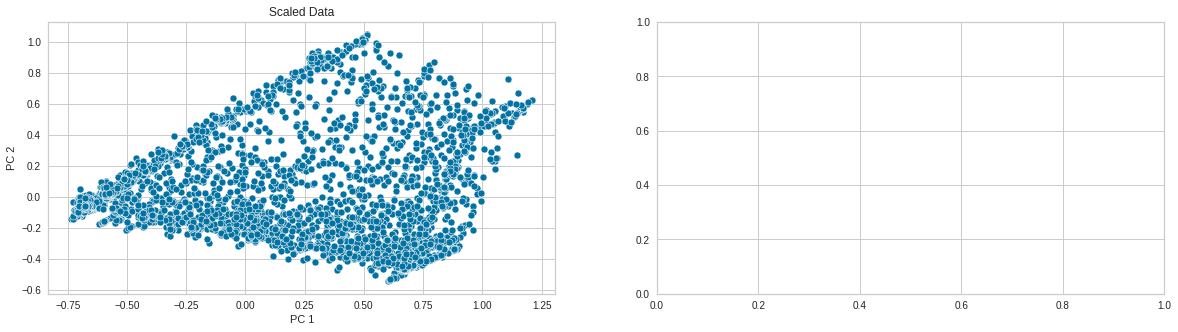

In [171]:
# plot data

pca_2d_scaled=PCA(n_components=2, random_state=0).fit(data_numskewscaled)
twod_scaled=pca_2d_scaled.transform(data_numskewscaled)

fig,ax=plt.subplots(ncols=2,figsize=(20,5))

sns.scatterplot(x=twod_scaled[:,0],y=twod_scaled[:,1],ax=ax[0])
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].set_title('Scaled Data')
plt.show()

Data Scientist memilih mereduksi feature menadi 5 dengan informasi 0.937.

## 9. Concate Between Numerical Columns and Categorical Columns

In [172]:
# menggabungkan feature yang ada

data_final = np.concatenate([data_numskewscaled, data_cat],  axis = 1)

# melihat data_final
data_final

array([[4.09809063e-02, 8.75000000e-01, 3.83431099e-03, ...,
        3.45335804e-02, 0.00000000e+00, 8.00000000e+00],
       [1.43043310e-02, 3.75000000e-01, 2.80143433e-02, ...,
        1.11783775e-03, 0.00000000e+00, 8.00000000e+00],
       [2.38226730e-02, 1.00000000e+00, 1.46161791e-02, ...,
        1.80387016e-03, 0.00000000e+00, 8.00000000e+00],
       ...,
       [7.15208780e-02, 1.00000000e+00, 0.00000000e+00, ...,
        4.09412344e-03, 0.00000000e+00, 1.10000000e+01],
       [5.73322114e-02, 1.00000000e+00, 0.00000000e+00, ...,
        3.62621901e-03, 0.00000000e+00, 1.10000000e+01],
       [1.86405521e-01, 1.00000000e+00, 4.99386120e-03, ...,
        1.07036552e-02, 0.00000000e+00, 1.10000000e+01]])

# VI. Model Definition & VII. Model Trainning

Data Scientist menggunakan Model Kmeans, Agglomerative, dan Spectral.

## Kmeans

In [173]:
# kmeans_per_k

kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(data_reduced5) for k in range(1, 9)]

Elbow Method


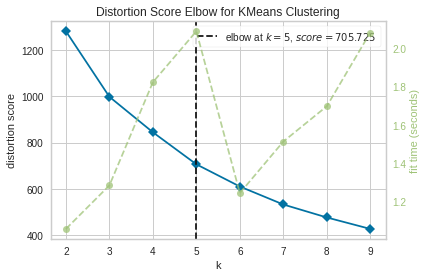

In [174]:
# elbow method

print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(data_reduced5)
Elbow_M.show()

In [175]:
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=21).fit(data_reduced5) for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [176]:
# inertia

inertias

[2458.7250104863097,
 1282.3039731490212,
 998.26905067488,
 844.5587039050874,
 705.7249825918029,
 609.4686339131422,
 531.5604337901322,
 475.3106301612132]

In [177]:
# silhouette_scores

silhouette_scores = [silhouette_score(data_reduced5, model.labels_) for model in kmeans_per_k[1:]]

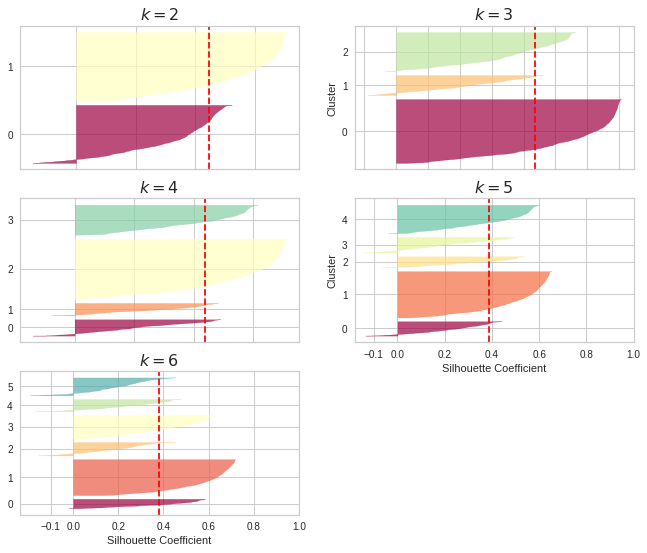

In [178]:
# fungsi silhouette

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_reduced5, y_pred)

    padding = len(data_reduced5) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Berdasarkan Elbow dan silhoutte, jumlah cluster yang direkomendasikan adalah 3 (n_clusters=3). Dilihat dari semua pisau (grafik) melewati garis merah dan bentuk masing-masing pisau tidak terlalu kontras.

In [179]:
# membuat model kmeans dengan n_clusters =3

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_reduced5)

KMeans(n_clusters=3, random_state=0)

## Agglomerative

Model Agglo menggunakan teknik elbow dan silhouette visualization yang sama dengan kmeans sehingga menggunakan n_clusters = 3.

In [180]:
# membuat model agglomerative dengan n_clusters =3

agglom = AC(n_clusters=3)
agglom.fit(data_reduced5)

AgglomerativeClustering(n_clusters=3)

## Spectral

Model Spectral menggunakan teknik elbow dan silhouette visualization yang sama dengan kmeans sehingga menggunakan n_clusters = 3.

In [181]:
# membuat model spectral dengan n_clusters =3

spectral = SC(n_clusters=3)
spectral.fit(data_reduced5)

SpectralClustering(n_clusters=3)

# VIII. Model Evaluation

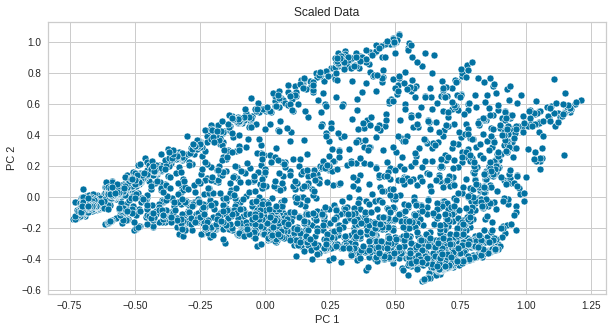

In [182]:
# sebelum clustering

pca_2d_scaled=PCA(n_components=2, random_state=0).fit(data_numskewscaled)
twod_scaled=pca_2d_scaled.transform(data_numskewscaled)

fig,ax=plt.subplots(figsize=(10,5))

sns.scatterplot(x=twod_scaled[:,0],y=twod_scaled[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scaled Data')
plt.show()

## KMeans

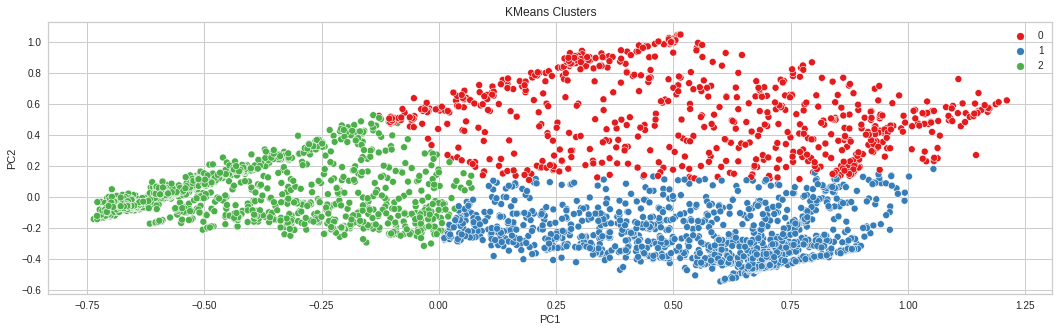

In [183]:
# visualisasi di data Kmean 2d

plt.figure(figsize=(18, 5))
sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [184]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

## Agglomerative

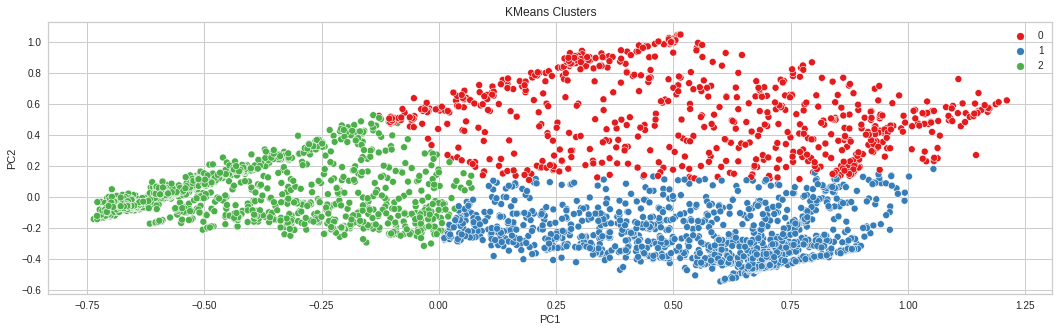

In [185]:
# visualisasi di data Agglo 2d

plt.figure(figsize=(18, 5))
sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [186]:
np.unique(agglom.labels_)

array([0, 1, 2])

## Spectral

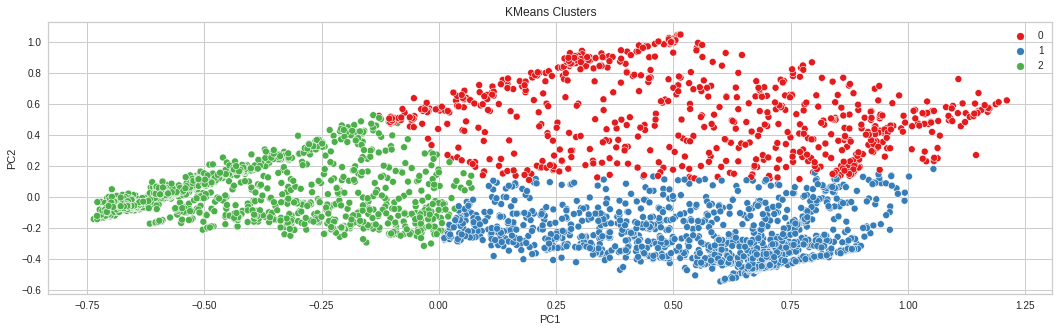

In [187]:
# visualisasi di data spectral 2d

plt.figure(figsize=(18, 5))
sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [188]:
np.unique(spectral.labels_)

array([0, 1, 2], dtype=int32)

- Berdasarkan 2D mapping menggunakan PCA dan variasi model label kmeans, agglomerative, dan spectral terlihat model telah berhasil mensegmentasi customer kartu kredit dengan baik.

- Data Scientist memilih menggunakan model kmeans untuk melakukan segmentasi terhadap customer kartu kredit.

## EDA 

In [189]:
# menambahkan kolom klasifikasi

data_cluster = data.copy()
data_cluster['cluster_K'] = kmeans.labels_
data_cluster['cluster_A'] = agglom.labels_
data_cluster['cluster_S']= spectral.labels_

data_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_K,cluster_A,cluster_S
2,757.964752,0.875,157.4,157.4,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,2,0,0
3,264.566591,0.375,1150.0,1150.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,2,0,0
4,440.613643,1.000,600.0,600.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,2,0,0
5,611.561026,1.000,765.0,765.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,2000.0,204.464151,146.352314,0.0,8,2,0,0
7,105.333584,0.375,306.0,306.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,2,6000.0,101.986927,118.324082,0.0,8,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,9629.808851,1.000,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,2,0,0
4451,1040.030221,1.000,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,2,0,0
4452,1322.818587,1.000,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,2,0,0
4453,1060.391273,1.000,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,2,0,0


### EDA kmeans

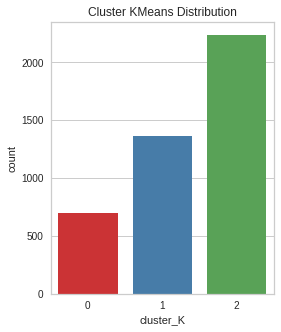

In [190]:
# membuat countplot

plt.figure(figsize=(4, 5))
sns.countplot(data=data_cluster, x='cluster_K', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

In [191]:
# menghitung variasi

data_cluster.groupby('cluster_K')['cluster_K'].count()

cluster_K
0     702
1    1361
2    2237
Name: cluster_K, dtype: int64

Text(0.5, 1.0, 'PAYMENTS K2')

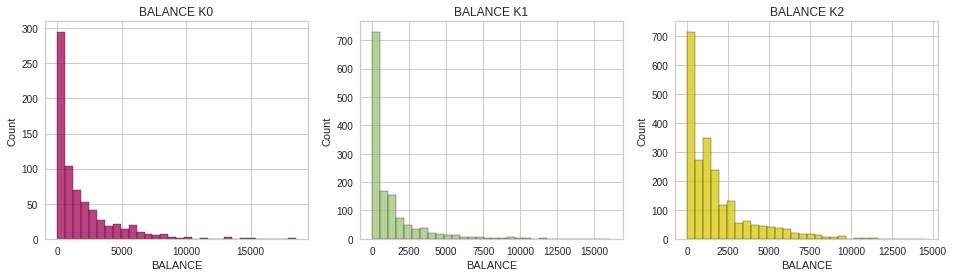

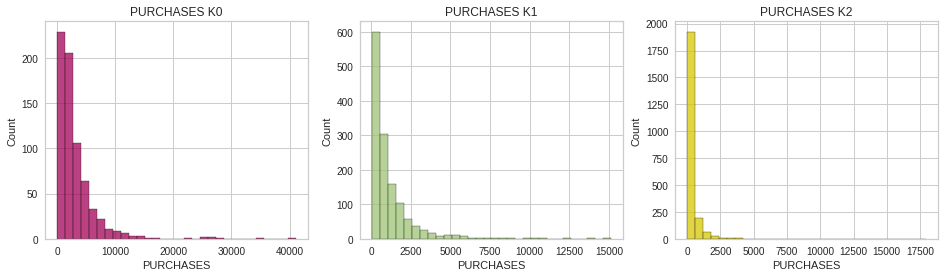

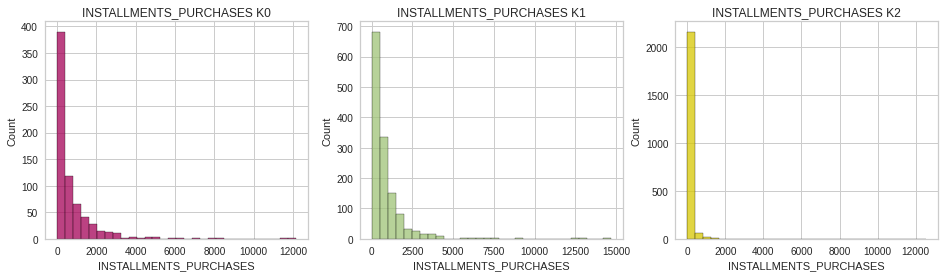

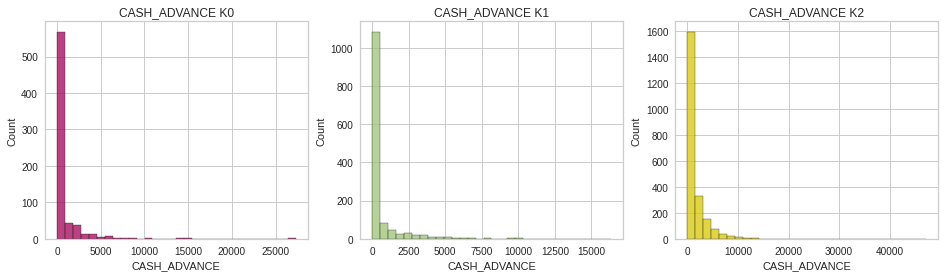

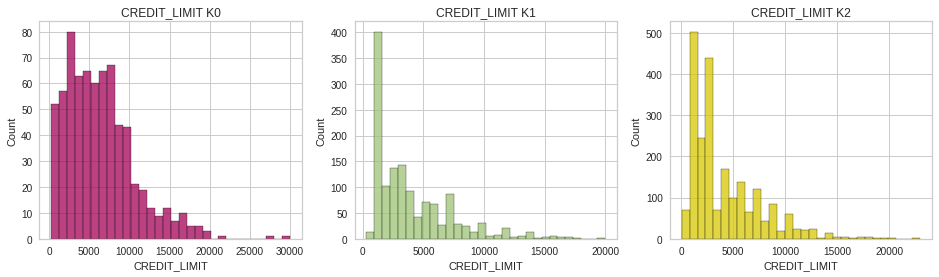

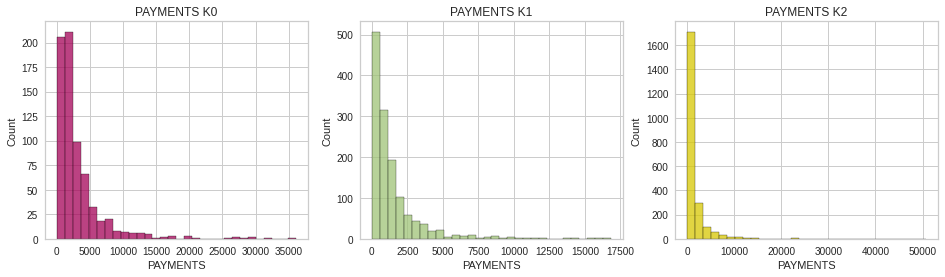

In [192]:
dataK0 = data_cluster[data_cluster.cluster_K == 0]
dataK1 = data_cluster[data_cluster.cluster_K == 1]
dataK2 = data_cluster[data_cluster.cluster_K == 2]

# melihat kolom BALANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'BALANCE', bins=30, color='m')
plt.title('BALANCE K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'BALANCE', bins=30, color='g')
plt.title('BALANCE K1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataK2, x = 'BALANCE', bins=30, color='y')
plt.title('BALANCE K2')

# melihat kolom PURCHASES
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'PURCHASES', bins=30, color='m')
plt.title('PURCHASES K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'PURCHASES', bins=30, color='g')
plt.title('PURCHASES K1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataK2, x = 'PURCHASES', bins=30, color='y')
plt.title('PURCHASES K2')

# melihat kolom CASH_ADVANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'INSTALLMENTS_PURCHASES', bins=30, color='m')
plt.title('INSTALLMENTS_PURCHASES K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'INSTALLMENTS_PURCHASES', bins=30, color='g')
plt.title('INSTALLMENTS_PURCHASES K1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataK2, x = 'INSTALLMENTS_PURCHASES', bins=30, color='y')
plt.title('INSTALLMENTS_PURCHASES K2')

# melihat kolom CASH_ADVANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'CASH_ADVANCE', bins=30, color='m')
plt.title('CASH_ADVANCE K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'CASH_ADVANCE', bins=30, color='g')
plt.title('CASH_ADVANCE K1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataK2, x = 'CASH_ADVANCE', bins=30, color='y')
plt.title('CASH_ADVANCE K2')

# melihat kolom CREDIT_LIMIT
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'CREDIT_LIMIT', bins=30, color='m')
plt.title('CREDIT_LIMIT K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'CREDIT_LIMIT', bins=30, color='g')
plt.title('CREDIT_LIMIT K1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataK2, x = 'CREDIT_LIMIT', bins=30, color='y')
plt.title('CREDIT_LIMIT K2')

# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'PAYMENTS', bins=30, color='m')
plt.title('PAYMENTS K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'PAYMENTS', bins=30, color='g')
plt.title('PAYMENTS K1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataK2, x = 'PAYMENTS', bins=30, color='y')
plt.title('PAYMENTS K2')

In [193]:
data_cluster.groupby('cluster_K').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_A,cluster_S
cluster_K,,,,,,,,,,,,,,,,,,,
0,1855.110232,0.973345,3168.493846,2187.826197,719.175271,703.096681,0.893301,0.802768,0.465031,0.095547,2.547009,42.199430,6468.414918,3283.450334,742.546245,0.284266,11.772080,1.727920,1.603989
1,1209.545037,0.928296,1148.866620,299.243101,846.161984,542.818292,0.874069,0.105730,0.823118,0.075897,1.764144,22.182954,4065.892763,1482.896788,1013.445507,0.240921,11.490081,0.972814,0.919177
2,1762.724275,0.849857,280.131913,214.891314,62.157407,1373.820714,0.142487,0.081169,0.060617,0.193202,4.634332,2.645060,4178.196042,1501.002890,833.981784,0.063588,11.498882,0.014305,0.000000


__Kluster 0 (dengan jumlah 702):__ kluster ini memiliki rata-rata balance, purchase, credit limit dan payment terbesar. installments_purchases, cash_advance di urutan kedua terbesar.

__Kluster 1 (dengan jumlah 1361):__ kluster memiliki rata-rata installment_purchases terbesar. Balance, purchases di urutan kedua. Cash_advance, credit limit, dan payment di urutan ketiga.

__Kluster 2 (dengan jumlah 2237):__ kluster memiliki rata-rata cash_advance di urutan pertaman. Balance, Credit_limit, payment di urutan kedua. purchases, installments_purchases di urutan ketiga.


### EDA agglomerative

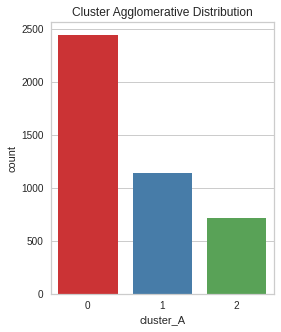

In [194]:
# membuat countplot

plt.figure(figsize=(4, 5))
sns.countplot(data=data_cluster, x='cluster_A', palette='Set1')
plt.title('Cluster Agglomerative Distribution')
plt.show()

In [195]:
data_cluster.groupby('cluster_A')['cluster_A'].count()

cluster_A
0    2445
1    1141
2     714
Name: cluster_A, dtype: int64

Text(0.5, 1.0, 'PAYMENTS A2')

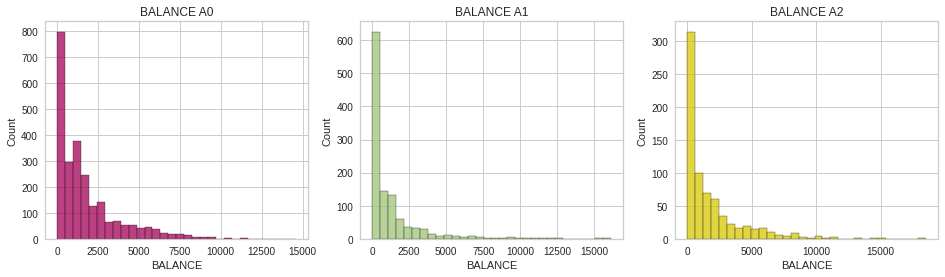

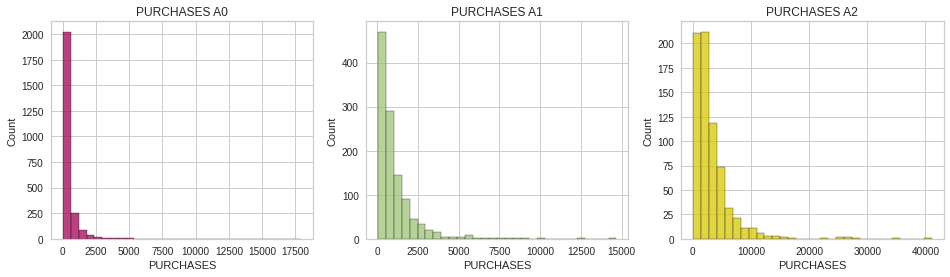

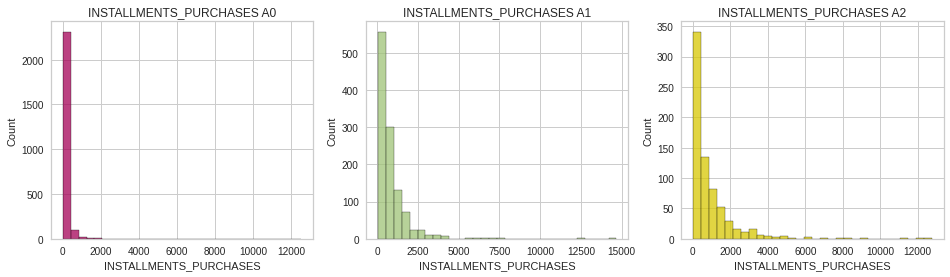

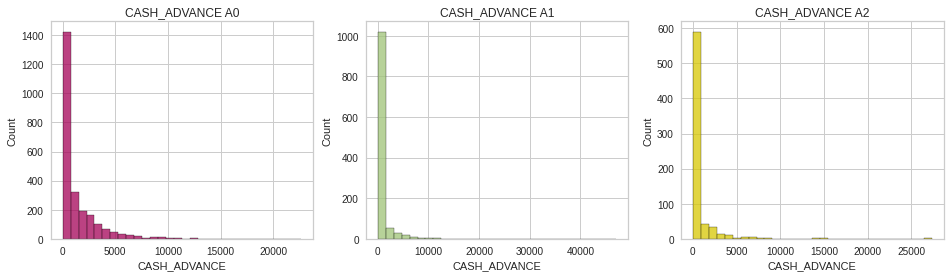

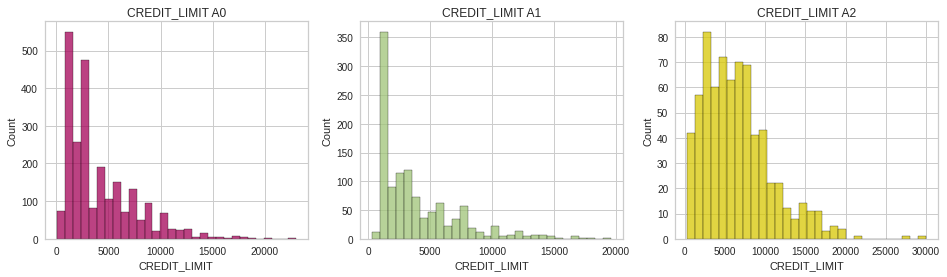

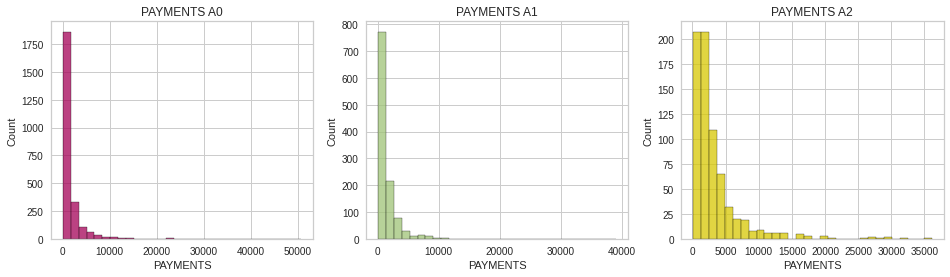

In [196]:
dataA0 = data_cluster[data_cluster.cluster_A == 0]
dataA1 = data_cluster[data_cluster.cluster_A == 1]
dataA2 = data_cluster[data_cluster.cluster_A == 2]

# melihat kolom BALANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataA0, x = 'BALANCE', bins=30, color='m')
plt.title('BALANCE A0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataA1, x = 'BALANCE', bins=30, color='g')
plt.title('BALANCE A1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataA2, x = 'BALANCE', bins=30, color='y')
plt.title('BALANCE A2')

# melihat kolom PURCHASES
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataA0, x = 'PURCHASES', bins=30, color='m')
plt.title('PURCHASES A0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataA1, x = 'PURCHASES', bins=30, color='g')
plt.title('PURCHASES A1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataA2, x = 'PURCHASES', bins=30, color='y')
plt.title('PURCHASES A2')

# melihat kolom CASH_ADVANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataA0, x = 'INSTALLMENTS_PURCHASES', bins=30, color='m')
plt.title('INSTALLMENTS_PURCHASES A0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataA1, x = 'INSTALLMENTS_PURCHASES', bins=30, color='g')
plt.title('INSTALLMENTS_PURCHASES A1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataA2, x = 'INSTALLMENTS_PURCHASES', bins=30, color='y')
plt.title('INSTALLMENTS_PURCHASES A2')

# melihat kolom CASH_ADVANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataA0, x = 'CASH_ADVANCE', bins=30, color='m')
plt.title('CASH_ADVANCE A0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataA1, x = 'CASH_ADVANCE', bins=30, color='g')
plt.title('CASH_ADVANCE A1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataA2, x = 'CASH_ADVANCE', bins=30, color='y')
plt.title('CASH_ADVANCE A2')

# melihat kolom CREDIT_LIMIT
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataA0, x = 'CREDIT_LIMIT', bins=30, color='m')
plt.title('CREDIT_LIMIT A0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataA1, x = 'CREDIT_LIMIT', bins=30, color='g')
plt.title('CREDIT_LIMIT A1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataA2, x = 'CREDIT_LIMIT', bins=30, color='y')
plt.title('CREDIT_LIMIT A2')

# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataA0, x = 'PAYMENTS', bins=30, color='m')
plt.title('PAYMENTS A0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataA1, x = 'PAYMENTS', bins=30, color='g')
plt.title('PAYMENTS A1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataA2, x = 'PAYMENTS', bins=30, color='y')
plt.title('PAYMENTS A2')

In [197]:
data_cluster.groupby('cluster_A').mean() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_K,cluster_S
cluster_A,,,,,,,,,,,,,,,,,,,
0,1752.263322,0.853220,354.404483,262.803959,85.365170,1309.773800,0.184625,0.099124,0.086010,0.186719,4.430266,3.841718,4187.649212,1494.541523,830.743678,0.060188,11.507566,1.869121,0.048262
1,1156.312003,0.937483,1061.973637,233.080228,826.743953,573.423086,0.903059,0.083580,0.857347,0.071659,1.737073,21.401402,3902.938013,1411.700616,1073.600406,0.258367,11.457493,1.000876,0.982472
2,1804.000789,0.969238,3272.148964,2122.318627,901.261807,628.730842,0.915477,0.772122,0.551524,0.090014,2.439776,44.705882,6623.357525,3383.814707,714.338505,0.318961,11.787115,0.172269,1.593838


Hanya mengambil kesimpulan untuk model KMeans karena akan hanya akan menggunakan model KMeans untuk inferencing.

### EDA spectral

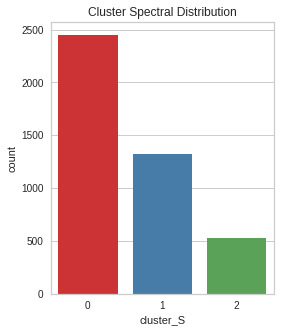

In [198]:
# membuat countplot

plt.figure(figsize=(4, 5))
sns.countplot(data=data_cluster, x='cluster_S', palette='Set1')
plt.title('Cluster Spectral Distribution')
plt.show()

In [199]:
# menghitung variasi

data_cluster.groupby('cluster_S')['cluster_S'].count()

cluster_S
0    2449
1    1325
2     526
Name: cluster_S, dtype: int64

Text(0.5, 1.0, 'PAYMENTS S2')

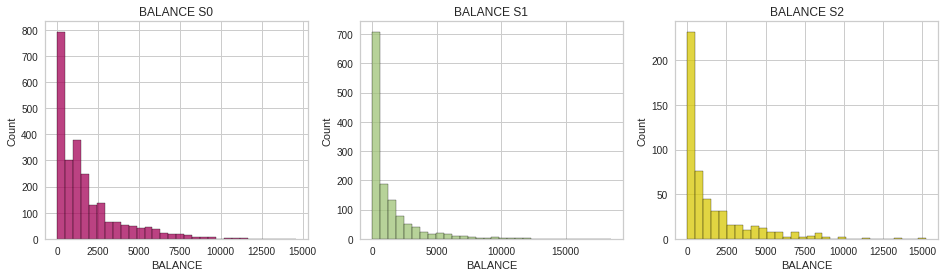

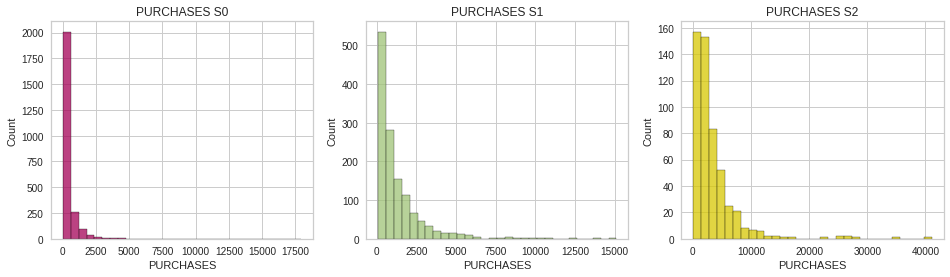

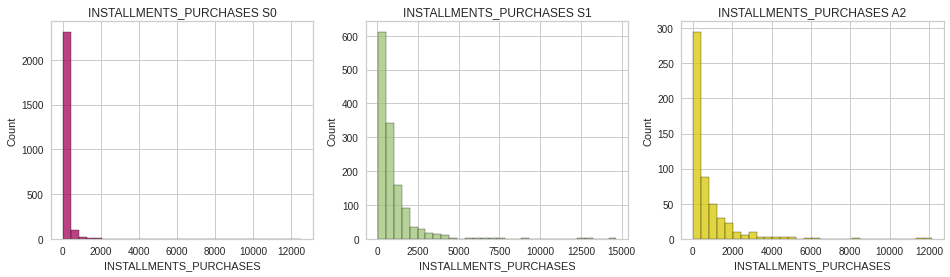

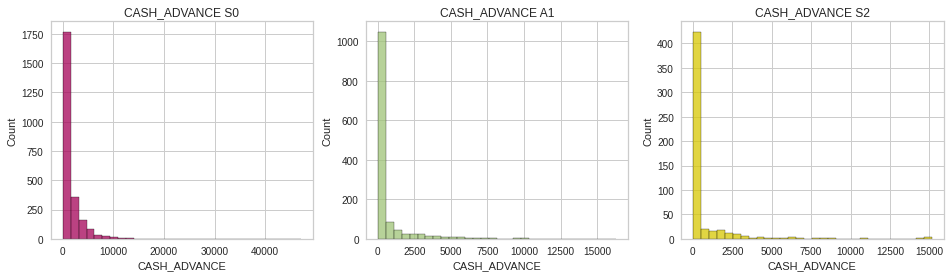

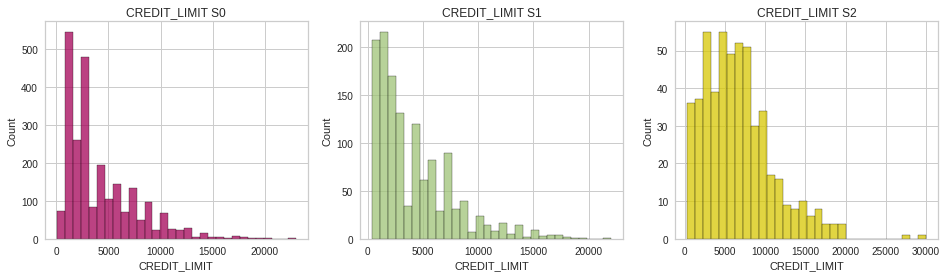

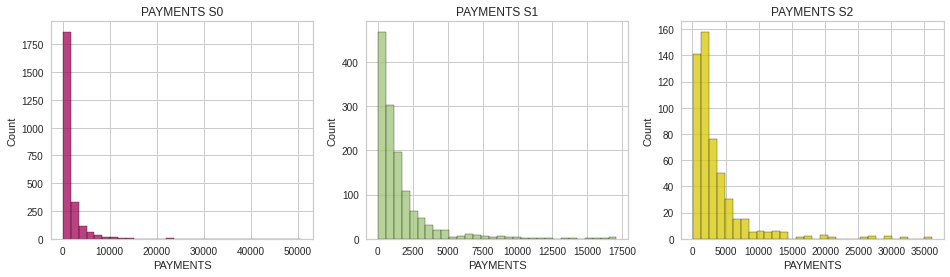

In [200]:
dataS0 = data_cluster[data_cluster.cluster_S == 0]
dataS1 = data_cluster[data_cluster.cluster_S == 1]
dataS2 = data_cluster[data_cluster.cluster_S == 2]

# melihat kolom BALANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataS0, x = 'BALANCE', bins=30, color='m')
plt.title('BALANCE S0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataS1, x = 'BALANCE', bins=30, color='g')
plt.title('BALANCE S1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataS2, x = 'BALANCE', bins=30, color='y')
plt.title('BALANCE S2')

# melihat kolom PURCHASES
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataS0, x = 'PURCHASES', bins=30, color='m')
plt.title('PURCHASES S0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataS1, x = 'PURCHASES', bins=30, color='g')
plt.title('PURCHASES S1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataS2, x = 'PURCHASES', bins=30, color='y')
plt.title('PURCHASES S2')

# melihat kolom CASH_ADVANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataS0, x = 'INSTALLMENTS_PURCHASES', bins=30, color='m')
plt.title('INSTALLMENTS_PURCHASES S0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataS1, x = 'INSTALLMENTS_PURCHASES', bins=30, color='g')
plt.title('INSTALLMENTS_PURCHASES S1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataS2, x = 'INSTALLMENTS_PURCHASES', bins=30, color='y')
plt.title('INSTALLMENTS_PURCHASES A2')

# melihat kolom CASH_ADVANCE
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataS0, x = 'CASH_ADVANCE', bins=30, color='m')
plt.title('CASH_ADVANCE S0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataS1, x = 'CASH_ADVANCE', bins=30, color='g')
plt.title('CASH_ADVANCE A1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataS2, x = 'CASH_ADVANCE', bins=30, color='y')
plt.title('CASH_ADVANCE S2')

# melihat kolom CREDIT_LIMIT
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataS0, x = 'CREDIT_LIMIT', bins=30, color='m')
plt.title('CREDIT_LIMIT S0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataS1, x = 'CREDIT_LIMIT', bins=30, color='g')
plt.title('CREDIT_LIMIT S1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataS2, x = 'CREDIT_LIMIT', bins=30, color='y')
plt.title('CREDIT_LIMIT S2')

# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataS0, x = 'PAYMENTS', bins=30, color='m')
plt.title('PAYMENTS S0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataS1, x = 'PAYMENTS', bins=30, color='g')
plt.title('PAYMENTS S1')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(dataS2, x = 'PAYMENTS', bins=30, color='y')
plt.title('PAYMENTS S2')

In [201]:
data_cluster.groupby('cluster_S').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_K,cluster_A
cluster_S,,,,,,,,,,,,,,,,,,,
0,1743.734602,0.853701,357.912920,261.350502,90.289600,1322.185004,0.181663,0.100022,0.085441,0.186467,4.486321,3.739077,4201.949590,1518.354267,825.856248,0.069990,11.522254,1.872601,0.063291
1,1330.464192,0.938435,1315.286000,404.006008,906.832566,569.293934,0.904977,0.135905,0.853871,0.078449,1.865660,24.984906,4214.211359,1595.575034,1066.871418,0.234052,11.464906,0.941132,1.080000
2,1631.979635,0.976597,3413.046673,2373.536844,708.861673,595.515144,0.934340,0.882107,0.459488,0.079768,2.085551,44.619772,6742.827515,3513.995452,627.485682,0.357738,11.817490,0.003802,1.868821


Hanya mengambil kesimpulan untuk model KMeans karena akan hanya akan menggunakan model KMeans untuk inferencing.



# IX. Model Inference

Datascientist melakukan PCA 5 feature dan klustering menggunakan KMeans 3 komponen.

In [202]:
# menampilkan data_i
data_i

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4299,1082.436807,1.000000,0.00,0.00,0.00,1835.406271,0.000000,0.000000,0.000000,0.250000,7,0,1500.0,2094.304543,258.977488,0.000000,12
1,3963,3121.267822,0.888889,4139.56,4139.56,0.00,3607.406242,0.333333,0.333333,0.000000,0.222222,3,8,9000.0,1600.272221,597.159149,0.000000,9
2,6557,4855.340797,1.000000,0.00,0.00,0.00,1886.470361,0.000000,0.000000,0.000000,0.083333,2,0,6000.0,2996.735376,1855.766226,0.000000,12
3,8897,7533.854422,1.000000,5253.06,3096.10,2156.96,0.000000,0.916667,0.833333,0.750000,0.000000,0,78,20500.0,1790.394949,1727.487481,0.000000,12
4,2187,5422.456378,1.000000,0.00,0.00,0.00,9972.234861,0.000000,0.000000,0.000000,0.166667,2,0,14000.0,1661.693077,1949.814235,0.000000,12
5,1497,882.715792,1.000000,120.00,0.00,120.00,322.935862,1.000000,0.000000,1.000000,0.250000,4,12,1000.0,307.584827,249.005928,0.000000,12
6,2445,47.872617,0.818182,649.00,147.42,501.58,0.000000,0.750000,0.166667,0.666667,0.000000,0,19,6000.0,624.293646,191.993448,0.875000,12
7,1677,148.511058,0.363636,562.24,349.00,213.24,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,9000.0,18.208604,74.163860,0.000000,12
8,8279,126.121035,0.454545,590.00,590.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,1471.720270,156.326043,0.000000,12
9,719,25.302553,0.714286,176.25,0.00,176.25,0.000000,0.714286,0.000000,0.571429,0.000000,0,5,1500.0,191.780690,99.580177,0.000000,7


In [203]:
data_i.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4146.600000,1519.578099,0.892848,800.943500,548.413500,252.530000,1015.239816,0.433631,0.125000,0.336905,0.081944,1.250000,10.500000,5210.000000,1114.249045,469.776987,0.127841,10.800000
std,2693.943742,2116.385019,0.185182,1400.456007,1111.452636,490.573934,2335.835992,0.392350,0.208552,0.368797,0.109445,1.860249,17.632207,5107.981371,738.458163,609.868443,0.301035,2.214783
min,719.000000,16.707289,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,18.208604,74.163860,0.000000,6.000000
25%,1798.500000,142.913552,0.864583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1425.000000,608.585249,145.790518,0.000000,11.250000
50%,3589.000000,743.811111,1.000000,319.475000,0.000000,74.615000,0.000000,0.333333,0.000000,0.208334,0.000000,0.000000,6.000000,3750.000000,1145.887160,223.550230,0.000000,12.000000
75%,6420.500000,1447.836739,1.000000,739.540000,514.242500,282.465000,701.053464,0.833333,0.187500,0.666667,0.166667,2.000000,10.500000,7125.000000,1503.858258,377.683067,0.000000,12.000000
max,8897.000000,7533.854422,1.000000,5253.060000,4139.560000,2156.960000,9972.234861,1.000000,0.833333,1.000000,0.333333,7.000000,78.000000,20500.000000,2996.735376,1949.814235,1.000000,12.000000


In [204]:
# handling outlier CREDIT LIMIT

data_i[data_i['BALANCE']> data_i['CREDIT_LIMIT']]
io_bi = data_i[data_i['BALANCE']> data_i['CREDIT_LIMIT']].index
data_i.loc[io_bi, 'BALANCE'] = data_i.loc[io_bi, 'CREDIT_LIMIT']

# handling outlier ONEOFF_PURCHASES
data_i[data_i['ONEOFF_PURCHASES']> data_i['CREDIT_LIMIT']].sort_values('CREDIT_LIMIT')
io_oopi =data_i[data_i['ONEOFF_PURCHASES']> data_i['CREDIT_LIMIT']].index
data_i.loc[io_oopi, 'ONEOFF_PURCHASES'] = data_i.loc[io_oopi, 'CREDIT_LIMIT']

# handling misval

data_i.isnull().sum()

# menunjukan data

data_i

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4299,1082.436807,1.000000,0.00,0.00,0.00,1835.406271,0.000000,0.000000,0.000000,0.250000,7,0,1500.0,2094.304543,258.977488,0.000000,12
1,3963,3121.267822,0.888889,4139.56,4139.56,0.00,3607.406242,0.333333,0.333333,0.000000,0.222222,3,8,9000.0,1600.272221,597.159149,0.000000,9
2,6557,4855.340797,1.000000,0.00,0.00,0.00,1886.470361,0.000000,0.000000,0.000000,0.083333,2,0,6000.0,2996.735376,1855.766226,0.000000,12
3,8897,7533.854422,1.000000,5253.06,3096.10,2156.96,0.000000,0.916667,0.833333,0.750000,0.000000,0,78,20500.0,1790.394949,1727.487481,0.000000,12
4,2187,5422.456378,1.000000,0.00,0.00,0.00,9972.234861,0.000000,0.000000,0.000000,0.166667,2,0,14000.0,1661.693077,1949.814235,0.000000,12
5,1497,882.715792,1.000000,120.00,0.00,120.00,322.935862,1.000000,0.000000,1.000000,0.250000,4,12,1000.0,307.584827,249.005928,0.000000,12
6,2445,47.872617,0.818182,649.00,147.42,501.58,0.000000,0.750000,0.166667,0.666667,0.000000,0,19,6000.0,624.293646,191.993448,0.875000,12
7,1677,148.511058,0.363636,562.24,349.00,213.24,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,9000.0,18.208604,74.163860,0.000000,12
8,8279,126.121035,0.454545,590.00,590.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,1471.720270,156.326043,0.000000,12
9,719,25.302553,0.714286,176.25,0.00,176.25,0.000000,0.714286,0.000000,0.571429,0.000000,0,5,1500.0,191.780690,99.580177,0.000000,7


In [205]:
# convert data using scaler and encoder

data_inum = data_i[num_cols]

data_inum_scaled = scaler2.transform(data_inum)

In [206]:
# reduce with PCA

data_ireduced5 = pca5.transform(data_inum_scaled)
data_ireduced5

array([[-0.66261533, -0.06390849, -0.06411255, -0.12611278, -0.09584764],
       [-0.34541774,  0.28459519, -0.13075481,  0.01442606,  0.10637854],
       [-0.65284838, -0.04060005, -0.09223208, -0.1500162 ,  0.01244165],
       [ 0.70470423,  0.46082502, -0.40918366,  0.03215982,  0.38352747],
       [-0.65374852, -0.01001454, -0.12261249, -0.2124518 ,  0.21209338],
       [ 0.66055806, -0.46696533, -0.25761212,  0.00913738, -0.06223141],
       [ 0.50431314, -0.07417526,  0.64067543, -0.15298608,  0.03275878],
       [-0.28397133, -0.11655722,  0.11993916,  0.48354687,  0.18617437],
       [-0.61305654, -0.03106003,  0.14645495,  0.40247272,  0.02411743],
       [ 0.18256503, -0.31140502, -0.05104724,  0.26157383, -0.08219714],
       [ 0.32939036,  0.04240439, -0.20703157,  0.08881659, -0.19924052],
       [ 0.54106186, -0.21221008,  0.76515864, -0.21236718, -0.06658386],
       [-0.64933286, -0.04335947, -0.06711767, -0.12477662, -0.03692686],
       [-0.33752292,  0.26924225, -0.1

In [207]:
# pengkategorian dengan kmeans

icluster_K= kmeans.predict(data_ireduced5)

# menambahkan kolom segmentasi berdasarkan kmeans

data_icluster= data_i.copy()
data_icluster['cluster_K'] = icluster_K

data_icluster

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_K
0,4299,1082.436807,1.000000,0.00,0.00,0.00,1835.406271,0.000000,0.000000,0.000000,0.250000,7,0,1500.0,2094.304543,258.977488,0.000000,12,2
1,3963,3121.267822,0.888889,4139.56,4139.56,0.00,3607.406242,0.333333,0.333333,0.000000,0.222222,3,8,9000.0,1600.272221,597.159149,0.000000,9,2
2,6557,4855.340797,1.000000,0.00,0.00,0.00,1886.470361,0.000000,0.000000,0.000000,0.083333,2,0,6000.0,2996.735376,1855.766226,0.000000,12,2
3,8897,7533.854422,1.000000,5253.06,3096.10,2156.96,0.000000,0.916667,0.833333,0.750000,0.000000,0,78,20500.0,1790.394949,1727.487481,0.000000,12,0
4,2187,5422.456378,1.000000,0.00,0.00,0.00,9972.234861,0.000000,0.000000,0.000000,0.166667,2,0,14000.0,1661.693077,1949.814235,0.000000,12,2
5,1497,882.715792,1.000000,120.00,0.00,120.00,322.935862,1.000000,0.000000,1.000000,0.250000,4,12,1000.0,307.584827,249.005928,0.000000,12,1
6,2445,47.872617,0.818182,649.00,147.42,501.58,0.000000,0.750000,0.166667,0.666667,0.000000,0,19,6000.0,624.293646,191.993448,0.875000,12,1
7,1677,148.511058,0.363636,562.24,349.00,213.24,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,9000.0,18.208604,74.163860,0.000000,12,2
8,8279,126.121035,0.454545,590.00,590.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,1471.720270,156.326043,0.000000,12,2
9,719,25.302553,0.714286,176.25,0.00,176.25,0.000000,0.714286,0.000000,0.571429,0.000000,0,5,1500.0,191.780690,99.580177,0.000000,7,1


In [208]:
# pengelompokkan customer baru ke dalam cluster_K

data_icluster.groupby('cluster_K')['cluster_K'].count()

cluster_K
0     1
1     7
2    12
Name: cluster_K, dtype: int64

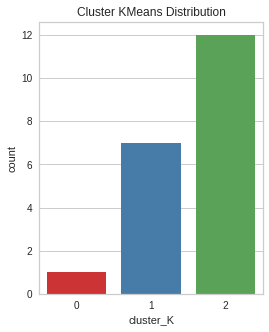

In [209]:
# visualisai berdasarkan cluster_K

plt.figure(figsize=(4, 5))
sns.countplot(data=data_icluster, x='cluster_K', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

Hasil pengelompokkan kustomer baru:
- kelompok 0: 1 customer
- kelompok 1: 7 customer
- kelompok 2: 12 customer

# X. Pengambilan Kesimpulan

Berdasarkan EDA:

- beberapa kolom pada mengalami rightskew and left skew.
- kolom credit limit memiliki hubungan yang positif dengan 8 kolom yakni, semakin besar CREDIT_LIMIT, semakin besar BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASES_TRX, PAYMENTS, meski ada beberapa data yang berbeda. Credit limit terbanyak ada di angka 0 sampai 5000, terutama di 3000.
- Lebih dari 3500 pengguna kartu kredit memiliki masa waktu 12 bulan, sisanya 6-11 bulan.
- Lebih dari 3000 nasabah hanya melakukan pembayaran rata2 0 - 0.2 persen setiap bulannya. Kemungkinan Nasabah Default sangat tinggi.

Berdasarkan preprocessing:
- Data scientist menemukan beberapa nilai yang melebihi CREDIT LIMIT, namun nilai tersebut bisa dimengerti karena customer dapat meminta kenaikan kredit temporer untuk kasus tertentu atau bisa terjadi ada tunggakkan dari bulan sebelumnya sehingga transaksi keluar lebih besar dari CREDIT LIMIT.
- Data Scientist melakukan handling terhadap kolom ONEOFF_PURCHASES_FREQUENCY yang merupakan limit maksimum per purchase yang melebihi CREDIT LIMIT. Data Scientist menyamakan nilai tersebut dengan nilai CREDIT LIMIT. Data Scientist juga melakukan handling terhadap niai CASH_ADVANCE_FREQUENCY yang berada di atas angka 1.
- Data Scientist melakukan pemisahan antara feature numerik dan feature kategorik. Kemudian Data Scientist melakukan Scaling terhadap data feature numerik. Feature kategori sudah berbentuk angka sehingga tidak perlu diencode lagi.
- Feature numerik kemudian direduksi menggunakan Principal Component Analysis (PCA) oleh Data Scientist menjadi 5 feature.
- Kemudian feature numerik dan kategori kembali disatukan.

Berdasarkan proses model evaluation dan analysis:
1. Penulis menggunakan model clustering KMeans, Agglomerative, dan Spectral.
2. Penulis mencari nilai k atau komponen yang tepat menggunakan elbow, silhoette score dan inertia. Penulis menemukan angka 3 sebagai jumlah kluster yang tepat.
3. Penulis melakukan pelatihan kepada model KMeans, Agglomerative, dan Spectral menggunakan k=3. Kemudian penulis memetakan data 2 dimensii menggunakan PCA dan hue masing-masing model.
4. Berdasarkan gambar model Kmeans, Agglomerative, dan Spectral telah mengklasifikasi kelas dengan baik. Namun Data Scientist memilih menggunakan model KMeans untuk mengelompokkan data customer baru karena berdasarkan gambar, model KMeans paling bagus dalam pengklasifikasian kelas.
5. KMeans mengelompokkan cust menjadi 3 kelas, kelas 0, kelas 1, kelas 2.
6. Agglomerative mengelompokkan cust menjadi 3 kelas, kelas 0, kelas 1, kelas 2.
7. Spectral mengelompokkan cust menjadi 3 kelas, kelas 0, kelas 1, kelas 2.

Insight berdasarkan klasifikasi menggunakan K-Means:
- Kluster 0 (dengan jumlah 702): kluster ini memiliki rata-rata balance, purchase, credit limit dan payment terbesar. installments_purchases, cash_advance di urutan kedua terbesar. Kluster 0 tergolong customer dengan transaksi terbaik. __Tim marketing dapat memberikan promo-promo terkait purchase dan keloyalan customer untuk meningkatkan transaksi.__

- Kluster 1 (dengan jumlah 1361): kluster memiliki rata-rata installment_purchases terbesar. Balance, purchases di urutan kedua. Cash_advance, credit limit, dan payment di urutan ketiga. __Tim marketing dapat memberikan promo-promo terkait installment_purchase dan keloyalan customer untuk meningkatkan transaksi.__

- Kluster 2 (dengan jumlah 2237): kluster memiliki rata-rata cash_advance di urutan pertaman. Balance, Credit_limit, payment di urutan kedua. purchases, installments_purchases di urutan ketiga. __Tim marketing dapat memberikan promo-promo terkait cash advance dan keloyalan customer untuk meningkatkan transaksi.__

# XI. Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Jawab 1:

Karena di algoritma kmeans menghiung jarak dr setiap data ke setiap centroid dan mengasign ke centroid dg jarak tertentu, karena algoritma memang ingin mengoptimasi (dlm hal ini minimum jarak ke setiap centroidnya) maka mudahnya menghitung jaraknya lalu kita rata2kan, d sklearn total jaraknya disebut inertia (inertia yg semakin kecil semakin baik kmeansnya). Inertia meminimumkan (jarak antara dlm 1 kluster).

Fungsi inersia dalam K-Means adalah mengukur seberapa bagus dataset dikelompokkan oleh K-Means.

Jawab 2:

__Alasan penggunaan:__

Jumlah kluster yang bagus adalah jumlah dengan nilai inertia minimum dengan beberapa kluster.  

Elbow method digunakan untuk menghitung jumlah kluster terbaik dengan nilai inertia minimum dengan kluster 

__Cara penggunaan:__

Data scientist melihat elbow kurva dan memilih jumlah kluster terbagus dengan nilai inertia yang mendekati 0. 

__Kekurangan:__

Kurang presisi karena mengandalkan penglihatan mata terhadap grafik dan bukan terhadap persebaran data. Kita bisa saja memilih elbow di titik 4 walaupun data seharusnya dibagi menjadi 5 kelompok karena ada 2 titik clustering yang berdekatan.

Jawab 3:

KMeans:
- k-means clustering merupakan algoritma unspervised learning berbasis centroid, dimana setiap cluster diasosiasikan dengan centroid. Tujuan utama dari algoritma ini adalah untuk meminimalkan jumlah jarak antara titik data dan cluster yang sesuai.

- DBSCAN merupakan algoritma yang menggunakan clustering berbasis density atau kepadatan.
- Spectral Clustering, pengelompokkan didasarkan atas kesamaan antara setiap data. Kesamaan tersebut dilihat dari keterkaitan antara setiap data. Pada Spectral Clustering akan dibentuk sebuah graph dari data yang ada. Di mana verteks dari graph tersebut merupakan setiap pada data. Edgenya berupa hubungan antar data yang biasanya bernilai jarak dari dua record yang berhubungan

Agglomerative:
- menggabungkan pasangan kluster data sample secara rekrusif menggunakan jarak penghubung non Euclidean. Parameter(number of clusters or distance threshold, linkage type, distance)

Spectral:
- Menghitung jarak tiap titik data dan kemudian menentukan titik pusat
- Bisa digunakan untuk data yang bukan circular.
- mengenal eigenvetor dan eigenvalue.